In [5]:
# 📌 Step 1: Імпорти
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [6]:
# 📌 Step 2: Введи свій список рітеншену (до 53 тижнів або менше)
observed_retention = [
    1.0, 0.6503, 0.6060, 0.5630, 0.5348, 0.5064, 0.4839, 0.4647, 0.4510,
    0.4631, 0.4265, 0.4099, 0.3832, 0.3725, 0.3586, 0.3428, 0.3307, 0.3236,
    0.3188, 0.3091, 0.2988, 0.2923, 0.2815, 0.2747, 0.2659, 0.2490, 0.2442,
    0.2343, 0.2318, 0.2260, 0.2175, 0.2128, 0.2070, 0.1991, 0.1912, 0.1857,
    0.1849, 0.1831, 0.1771, 0.1661, 0.1590, 0.1548, 0.1500, 0.1483, 0.1302
]

In [22]:
# 📌 Step 3: sBG-функція для прогнозу ретеншну
def sbg_retention(alpha, beta, periods):
    retention = [1.0]
    for t in range(1, periods):
        p = beta / (alpha + beta + t - 1)
        retention.append(retention[-1] * (1 - p))
    return retention

# 📌 Step 4: Loss function (RMSE)
def loss(params):
    alpha, beta = params
    predicted = sbg_retention(alpha, beta, len(observed_retention))
    weights = np.ones_like(observed_retention)
    weights[:4] = 3  # Перші тижні — втричі важливіші
    return np.sqrt(np.average((np.array(predicted) - np.array(observed_retention))**2, weights=weights))


# 📌 Step 5: Пошук найкращих alpha і beta
res = minimize(
    loss,
    x0=[1.0, 1.0],
    bounds=[(0.0000000001, 1000), (0.0000010000, 1000)],
    method='Powell',
    options={'xtol': 1e-8, 'ftol': 1e-10, 'disp': True}
)
alpha_opt, beta_opt = res.x

Optimization terminated successfully.
         Current function value: 0.041523
         Iterations: 9
         Function evaluations: 627



🔎 Оптимальні параметри:
Alpha: 1.1902
Beta:  0.4121

📊 RMSE: 0.04037
📊 MAE:  0.03447
📊 R²:   0.94186



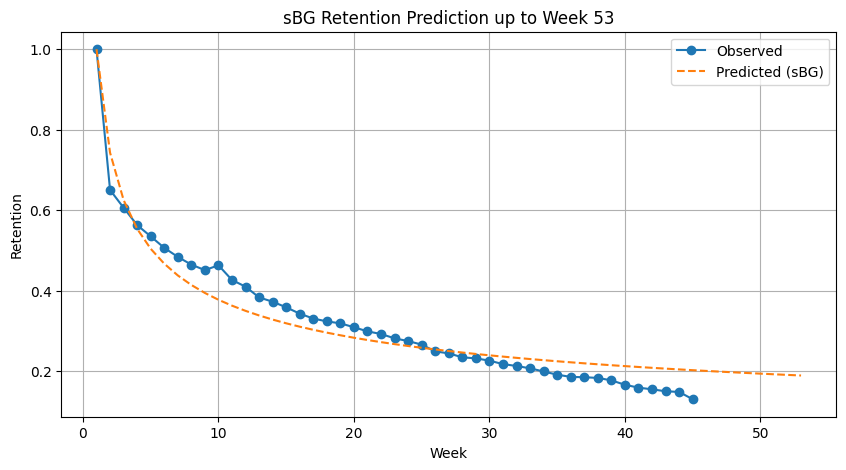

Список прогнозованих значень sBG retention (до 53 тижнів):
Week 1: 1.0
Week 2: 0.7428
Week 3: 0.6252
Week 4: 0.5537
Week 5: 0.5041
Week 6: 0.467
Week 7: 0.4379
Week 8: 0.4141
Week 9: 0.3943
Week 10: 0.3774
Week 11: 0.3627
Week 12: 0.3498
Week 13: 0.3384
Week 14: 0.3281
Week 15: 0.3189
Week 16: 0.3104
Week 17: 0.3027
Week 18: 0.2956
Week 19: 0.2891
Week 20: 0.283
Week 21: 0.2774
Week 22: 0.2721
Week 23: 0.2671
Week 24: 0.2624
Week 25: 0.258
Week 26: 0.2539
Week 27: 0.25
Week 28: 0.2462
Week 29: 0.2427
Week 30: 0.2393
Week 31: 0.2361
Week 32: 0.233
Week 33: 0.2301
Week 34: 0.2272
Week 35: 0.2245
Week 36: 0.2219
Week 37: 0.2194
Week 38: 0.217
Week 39: 0.2147
Week 40: 0.2125
Week 41: 0.2103
Week 42: 0.2082
Week 43: 0.2062
Week 44: 0.2043
Week 45: 0.2024
Week 46: 0.2006
Week 47: 0.1988
Week 48: 0.1971
Week 49: 0.1954
Week 50: 0.1938
Week 51: 0.1922
Week 52: 0.1907
Week 53: 0.1892


In [23]:
# 📌 Step 6: Генеруємо прогноз на 53 тижні
predicted_full = sbg_retention(alpha_opt, beta_opt, 53)

# 📌 Step 7: Метрики точності (по спостережуваному періоду)
predicted_fit = sbg_retention(alpha_opt, beta_opt, len(observed_retention))
rmse = np.sqrt(mean_squared_error(observed_retention, predicted_fit))
mae = mean_absolute_error(observed_retention, predicted_fit)
r2 = r2_score(observed_retention, predicted_fit)

print(f"\n🔎 Оптимальні параметри:")
print(f"Alpha: {alpha_opt:.4f}")
print(f"Beta:  {beta_opt:.4f}")
print(f"\n📊 RMSE: {rmse:.5f}")
print(f"📊 MAE:  {mae:.5f}")
print(f"📊 R²:   {r2:.5f}\n")

# 📌 Step 8: Візуалізація
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(observed_retention)+1), observed_retention, 'o-', label='Observed')
plt.plot(range(1, 54), predicted_full, '--', label='Predicted (sBG)')
plt.xlabel("Week")
plt.ylabel("Retention")
plt.legend()
plt.title("sBG Retention Prediction up to Week 53")
plt.grid(True)
plt.show()

# 📌 Step 9: Вивід прогнозованих значень
print("Список прогнозованих значень sBG retention (до 53 тижнів):")
for i, r in enumerate(predicted_full, 1):
    print(f"Week {i}: {round(r, 4)}")